In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [29]:
X=np.random.randn(100)
X=np.sort(X)
y=X**2*0.2+0.03+np.random.randn(100)*0.01
X=X.reshape(-1,1).astype(np.float32)
y=y.reshape(-1,1).astype(np.float32)

In [50]:
with tf.variable_scope('bala2',reuse=tf.AUTO_REUSE):
    w=tf.get_variable('w',[1,1],dtype=tf.float32,initializer=tf.truncated_normal_initializer())
    b=tf.get_variable('b',[1],dtype=tf.float32,initializer=tf.zeros_initializer())
    y_hat=tf.matmul(X**2,w)+b    
    cost=tf.reduce_mean(tf.square(y-y_hat))
    optimizer=tf.train.AdamOptimizer(1e-3).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        sess.run(optimizer)
        if not i % 100:
            print('cost:\t',sess.run(cost))
    y_hat=sess.run(y_hat)

cost:	 0.23611346
cost:	 0.09291748
cost:	 0.037728142
cost:	 0.018246278
cost:	 0.009427201
cost:	 0.0046354807
cost:	 0.0021176198
cost:	 0.00091788516
cost:	 0.00040354536
cost:	 0.00020525765


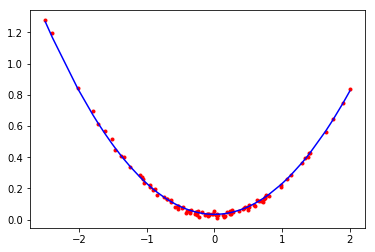

In [51]:

plt.plot(X,y,'r.')
plt.plot(X,y_hat,'b-')